<a href="https://colab.research.google.com/github/themathcook68/Cat-Classifier/blob/main/Copy_of_Cat_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 189 kB 43.7 MB/s 
     |████████████████████████████████| 1.2 MB 29.5 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 51 kB 307 kB/s 
Mounted at /content/gdrive


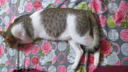

In [ ]:
from fastbook import *
from fastai.vision.widgets import *
dest = '/content/drive/My Drive/Cat Classifier/Meenu/20201027_200641.jpg'
im = Image.open(dest)
im.to_thumb(128, 128)

In [ ]:
Cats = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter =RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(224, min_scale = 0.5),
    batch_tfms= aug_transforms()
)

In [ ]:
dls = Cats.dataloaders('/content/drive/My Drive/Cat Classifier')

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


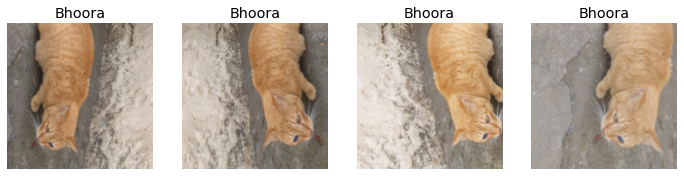

In [ ]:
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.190842,1.344317,0.444444,01:29


epoch,train_loss,valid_loss,error_rate,time
0,0.334997,0.221727,0.088889,01:10
1,0.233640,0.027874,0.000000,01:08
2,0.159895,0.009096,0.000000,01:08
3,0.123415,0.007760,0.000000,01:08


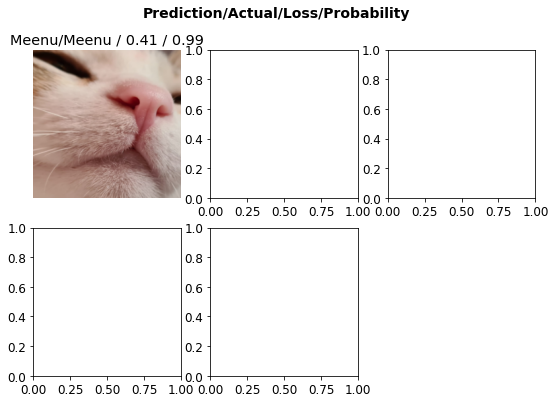

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(5)

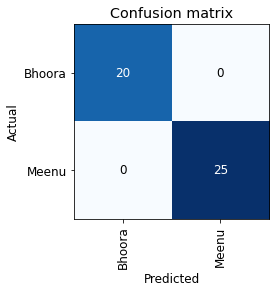

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.dls.vocab

['Bhoora', 'Meenu']

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload = SimpleNamespace(data = ['/content/drive/My Drive/Cat Classifier/Meenu/20201027_200641.jpg'])
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run = widgets.Button(description='Classify')
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your cat!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
